<a href="https://colab.research.google.com/github/EduHdzVillasana/Proyecto_ML_BEDU/blob/main/Proyecto_ML_BEDU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto BEDU Machine Learning
**Integrantes**
* Eduardo Alán Hernández Villasana
* Cristopher Arvizu Cano
* José Antonio Aguilar Téllez

## Librerias a utilizar

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import warnings
import os

warnings.simplefilter(action='ignore', category=FutureWarning)

## Carga del Dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#df = pd.read_csv('/content/drive/MyDrive/Datos Análisis del Crimen en Chicago/Crimes_2001-2021_clean.csv', index_col=0, )
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/BEDU/Datos Análisis del Crimen en Chicago/Crimes_2001-2021_clean.csv', index_col=0, )

### Limpieza de datos y casting de fechas

In [4]:
df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,10224738,HY411648,2015-09-05 13:30:00,043XX S WOOD ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,924,9.0,12.0,61.0,08B,1165074.0,1875917.0,2015,2018-02-10 15:50:01,41.815117,-87.670000,"(41.815117282, -87.669999562)"
1,10224739,HY411615,2015-09-04 11:30:00,008XX N CENTRAL AVE,0870,THEFT,POCKET-PICKING,CTA BUS,False,False,1511,15.0,29.0,25.0,06,1138875.0,1904869.0,2015,2018-02-10 15:50:01,41.895080,-87.765400,"(41.895080471, -87.765400451)"
3,10224740,HY411595,2015-09-05 12:45:00,035XX W BARRY AVE,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,1412,14.0,35.0,21.0,18,1152037.0,1920384.0,2015,2018-02-10 15:50:01,41.937406,-87.716650,"(41.937405765, -87.716649687)"
4,10224741,HY411610,2015-09-05 13:00:00,0000X N LARAMIE AVE,0560,ASSAULT,SIMPLE,APARTMENT,False,True,1522,15.0,28.0,25.0,08A,1141706.0,1900086.0,2015,2018-02-10 15:50:01,41.881903,-87.755121,"(41.881903443, -87.755121152)"
5,10224742,HY411435,2015-09-05 10:55:00,082XX S LOOMIS BLVD,0610,BURGLARY,FORCIBLE ENTRY,RESIDENCE,False,False,614,6.0,21.0,71.0,05,1168430.0,1850165.0,2015,2018-02-10 15:50:01,41.744379,-87.658431,"(41.744378879, -87.658430635)"


In [5]:
# No existen los Distritos policiales 21 y 31. 

df = df[df["District"] != 21.0]
df = df[df["District"] != 31.0]

In [6]:
# Algunos delitos registrados salen del área de Chicago

df= df[df["Latitude"] > 41]

In [7]:
# Casting de datos booleanos
df['Arrest'] = df['Arrest'].apply(lambda x: 1 if x == True else 0)
df['Domestic'] = df['Domestic'].apply(lambda x: 1 if x == True else 0)

In [8]:
df['Date'] = pd.to_datetime(df.Date)

In [9]:
df.dtypes

ID                               int64
Case Number                     object
Date                    datetime64[ns]
Block                           object
IUCR                            object
Primary Type                    object
Description                     object
Location Description            object
Arrest                           int64
Domestic                         int64
Beat                             int64
District                       float64
Ward                           float64
Community Area                 float64
FBI Code                        object
X Coordinate                   float64
Y Coordinate                   float64
Year                             int64
Updated On                      object
Latitude                       float64
Longitude                      float64
Location                        object
dtype: object

# Arena de Regresores

In [69]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import TimeSeriesSplit

import matplotlib.pyplot as plt
import seaborn as sns

In [70]:
file_url = "https://raw.githubusercontent.com/EduHdzVillasana/Proyecto_ML_BEDU/main/crime_time_series.csv"

In [71]:
ts_crime = pd.read_csv(file_url).drop(columns = ["Unnamed: 0"])
ts_crime = ts_crime[:-1]
ts_crime.head(10)

,Date,Total_Crimes
0,2002-04-25,1294
1,2002-04-26,1367
2,2002-04-27,1254
3,2002-04-28,1119
4,2002-04-29,1447
5,2002-04-30,1322
6,2002-05-01,1450
7,2002-05-02,1244
8,2002-05-03,1296
9,2002-05-04,1283


In [72]:
ts_crime['Date'] = pd.to_datetime(ts_crime.Date)

In [73]:
def transformarSerieADataset(serie, elementosPorMuestra):
    dataset = None
    salidasDataset = None
    for counter in range (len(serie)-elementosPorMuestra-1):        
        muestra = np.array([serie[counter:counter+elementosPorMuestra]])        
        salida = np.array([serie[counter+elementosPorMuestra]])
        if dataset is None:
            dataset = muestra
        else:
            dataset = np.append(dataset,muestra,axis = 0)
        if salidasDataset is None:
            salidasDataset = salida    
        else:        
            salidasDataset = np.append(salidasDataset,salida)
    return dataset, salidasDataset

## Regresión Lineal

### Instancia 1:
**Parámetros**
* Elementos por muestra : 7

In [74]:
X, Y = transformarSerieADataset(ts_crime["Total_Crimes"].to_numpy(), elementosPorMuestra = 7)

In [75]:
print(X.shape)
print(Y.shape)

(6925, 7)
(6925,)


In [76]:
Y[:10]

array([1244, 1296, 1283, 1254, 1234, 1278, 1372, 1366, 1492, 1235])

In [77]:
n = 7
start = n
end = ts_crime.shape[0] - 2
(start, end)

(7, 6931)

In [78]:
ts_crime[7:6933]

,Date,Total_Crimes
7,2002-05-02,1244
8,2002-05-03,1296
9,2002-05-04,1283
10,2002-05-05,1254
11,2002-05-06,1234
...,...,...
6928,2021-04-13,481
6929,2021-04-14,434
6930,2021-04-15,443
6931,2021-04-16,458


In [79]:
X_train = X[:int(X.shape[0]*0.7)]
X_test = X[int(X.shape[0]*0.7):]
Y_train = Y[:int(X.shape[0]*0.7)]
Y_test = Y[int(X.shape[0]*0.7):]

In [80]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(4847, 7)
(2078, 7)
(4847,)
(2078,)


In [81]:
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [82]:
def get_metrics (real, prediction):
  MSE = (mean_squared_error(real, prediction))
  print("MSE = "+str(MSE))

  r2 = (r2_score(real, prediction))
  print("r^2 = "+str(r2))

In [83]:
Y_predicted = lin_model.predict(X)
df_comparation = pd.DataFrame({"Date":ts_crime["Date"][7:-1],
                               "Real":Y,
                               "Prediccion":Y_predicted})
df_comparation.shape

(6925, 3)

Text(0.5, 1.0, 'Crimenes en Chicago 2001-2021')

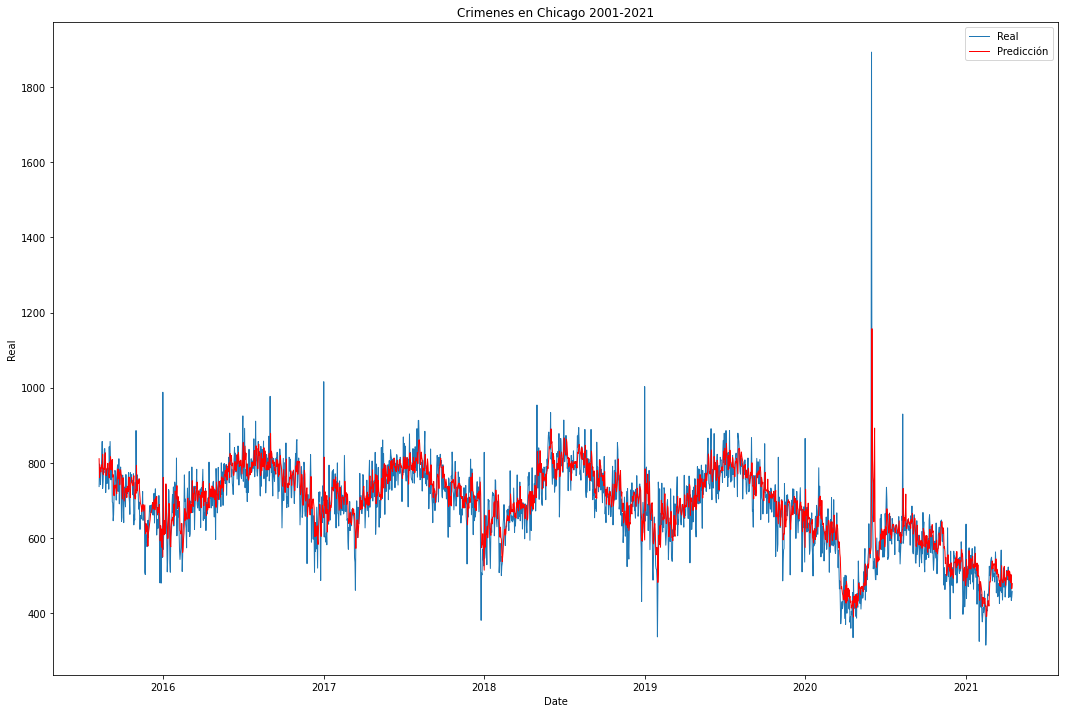

In [84]:
fig = plt.figure(figsize=(18,12))
ax = fig.add_subplot()
sns.lineplot(x=df_comparation["Date"][int(X.shape[0]*0.7):], y=df_comparation["Real"][int(X.shape[0]*0.7):], label = "Real" , linewidth = 1, ax = ax)
sns.lineplot(x=df_comparation["Date"][int(X.shape[0]*0.7):],y=df_comparation["Prediccion"][int(X.shape[0]*0.7):], label = "Predicción" , linewidth = 1, ax = ax, color = "red")
ax.set_title("Crimenes en Chicago 2001-2021")

In [85]:
get_metrics(df_comparation["Real"], df_comparation["Prediccion"])

MSE = 6905.051132351429
r^2 = 0.9049237402066969


Text(0.5, 1.0, 'Crimenes en Chicago 2001-2021')

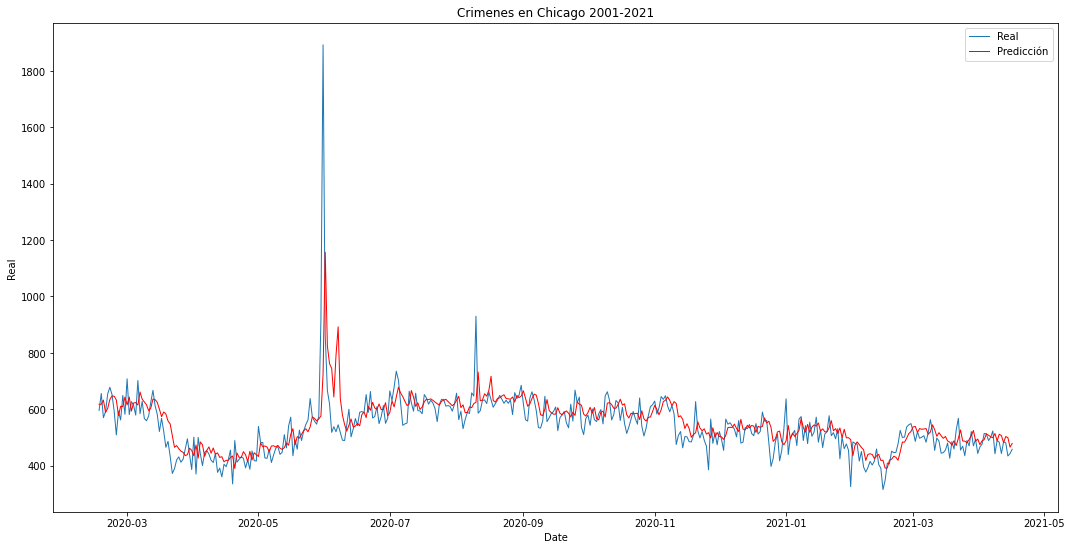

In [86]:
fig = plt.figure(figsize=(18,9))
ax = fig.add_subplot()
sns.lineplot(x=df_comparation["Date"][6500:], y=df_comparation["Real"][6500:], linewidth = 1, label = "Real" , ax = ax)
sns.lineplot(x=df_comparation["Date"][6500:],y=df_comparation["Prediccion"][6500:], linewidth = 1, label = "Predicción" , ax = ax, color = "red")
ax.set_title("Crimenes en Chicago 2001-2021")

In [87]:
index = int(X.shape[0]*0.7)
X_f = X[index:index+1]
X_f

array([[806, 722, 745, 753, 793, 815, 837]])

In [88]:
y_lm_7_prediction = lin_model.predict(X_test)
y_lm_7_prediction.shape, X_test.shape

((2078,), (2078, 7))

In [89]:
get_metrics(y_lm_7_prediction, Y_test)

MSE = 4148.874877849269
r^2 = 0.5635582379808834


In [90]:
ts_crime[int(X.shape[0]*0.7)+7:-1]

,Date,Total_Crimes
4854,2015-08-09,737
4855,2015-08-10,797
4856,2015-08-11,778
4857,2015-08-12,742
4858,2015-08-13,769
...,...,...
6927,2021-04-12,484
6928,2021-04-13,481
6929,2021-04-14,434
6930,2021-04-15,443


In [91]:
df_comparation = pd.DataFrame({"Date" : ts_crime["Date"][int(X.shape[0]*0.7)+7:-1],
                              "Real" : Y_test,
                              "Prediccion" : y_lm_7_prediction})

Text(0.5, 1.0, 'Crimenes en Chicago 2001-2021')

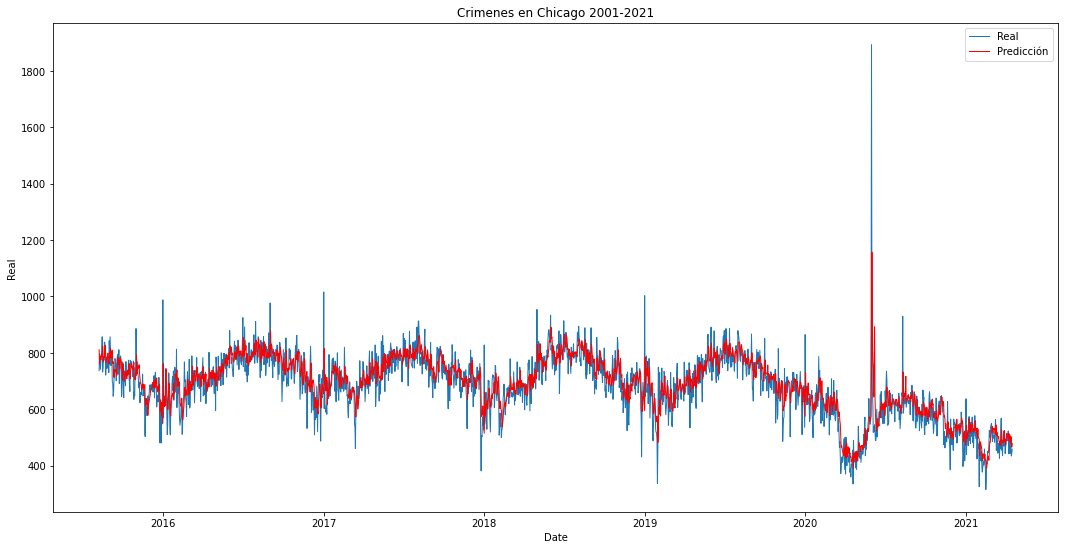

In [92]:
fig = plt.figure(figsize=(18,9))
ax = fig.add_subplot()
sns.lineplot(x=df_comparation["Date"], y=df_comparation["Real"], linewidth = 1, label = "Real" ,ax = ax)
sns.lineplot(x=df_comparation["Date"],y=df_comparation["Prediccion"], linewidth = 1, label = "Predicción", ax = ax, color = "red")
ax.set_title("Crimenes en Chicago 2001-2021")

In [93]:
Y_f = []

In [94]:
for i in range (len(X_test)):
  pred = lin_model.predict(X_f[-1].reshape(1,-1))[0]
  Y_f.append(pred)
  x_tmp = list(X_f[-1][1:])
  x_tmp.append(pred)
  X_f = np.append(X_f,[x_tmp], axis=0)

In [95]:
y_lm_7_forecasting = np.array(Y_f)

In [96]:
df_comparation = pd.DataFrame({"Date" : df_comparation["Date"],
                              "Real" : Y_test,
                              "Prediccion" : Y_f})

Text(0.5, 1.0, 'Crimenes en Chicago 2001-2021')

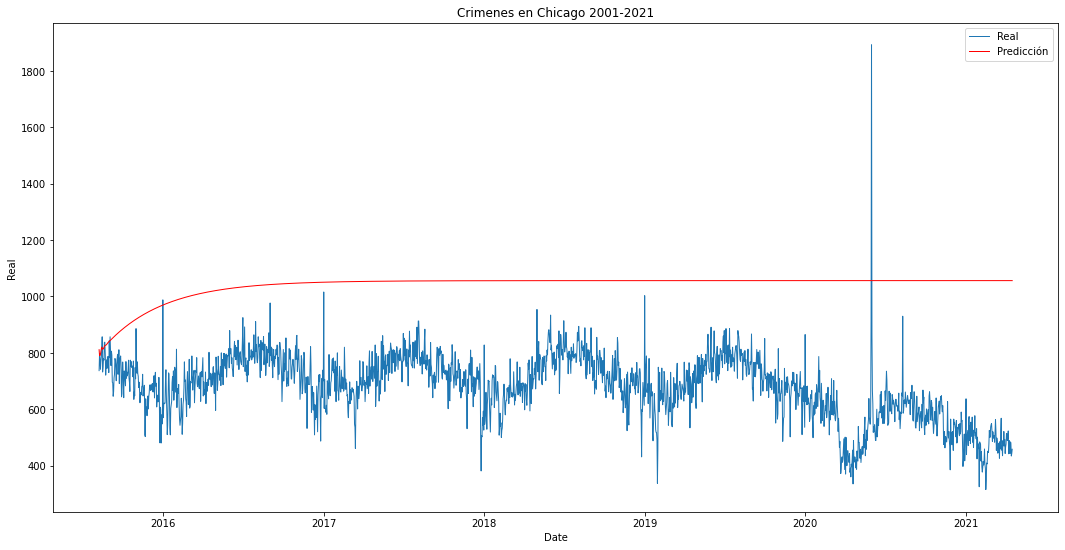

In [97]:
fig = plt.figure(figsize=(18,9))
ax = fig.add_subplot()
sns.lineplot(x=df_comparation["Date"], y=df_comparation["Real"], linewidth = 1, label = "Real" ,ax = ax)
sns.lineplot(x=df_comparation["Date"],y=df_comparation["Prediccion"], linewidth = 1, label = "Predicción", ax = ax, color = "red")
ax.set_title("Crimenes en Chicago 2001-2021")

In [98]:
get_metrics(df_comparation["Real"], df_comparation["Prediccion"])

MSE = 145588.41565111658
r^2 = -10.360105168827719


### Instancia 2:
**Parámetros**
* Elementos por muestra : 14

In [99]:
X, Y = transformarSerieADataset(ts_crime["Total_Crimes"].to_numpy(), elementosPorMuestra = 14)

In [100]:
print(X.shape)
print(Y.shape)

(6918, 14)
(6918,)


In [101]:
n = 14
start = n
end = ts_crime.shape[0] - 1
(start, end)

(14, 6932)

In [102]:
X_train = X[:int(X.shape[0]*0.7)]
X_test = X[int(X.shape[0]*0.7):]
Y_train = Y[:int(X.shape[0]*0.7)]
Y_test = Y[int(X.shape[0]*0.7):]

In [103]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(4842, 14)
(2076, 14)
(4842,)
(2076,)


In [104]:
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [105]:
def get_metrics (real, prediction):
  MSE = (mean_squared_error(real, prediction))
  print("MSE = "+str(MSE))

  r2 = (r2_score(real, prediction))
  print("r^2 = "+str(r2))

In [106]:
Y_predicted = lin_model.predict(X)
df_comparation = pd.DataFrame({"Date":ts_crime["Date"][14:-1],
                               "Real":Y,
                               "Prediccion":Y_predicted})
df_comparation.shape

(6918, 3)

Text(0.5, 1.0, 'Crimenes en Chicago 2001-2021 LR 2')

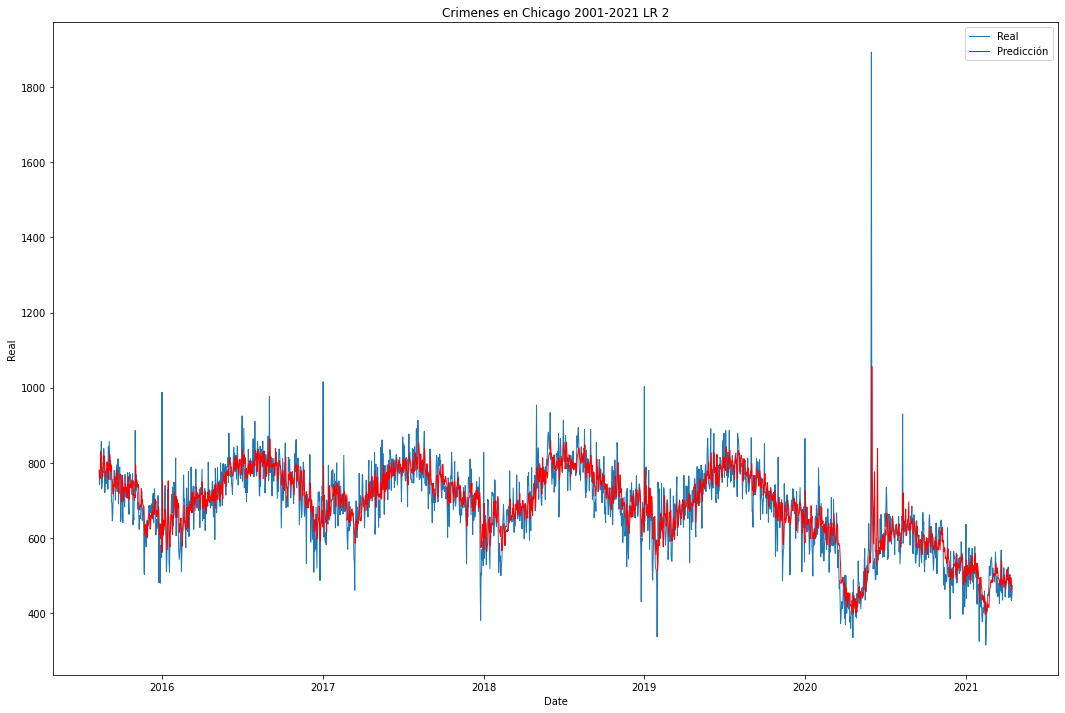

In [107]:
fig = plt.figure(figsize=(18,12))
ax = fig.add_subplot()
sns.lineplot(x=df_comparation["Date"][int(X.shape[0]*0.7):], y=df_comparation["Real"][int(X.shape[0]*0.7):], label = "Real" , linewidth = 1, ax = ax)
sns.lineplot(x=df_comparation["Date"][int(X.shape[0]*0.7):],y=df_comparation["Prediccion"][int(X.shape[0]*0.7):], label = "Predicción" , linewidth = 1, ax = ax, color = "red")
ax.set_title("Crimenes en Chicago 2001-2021 LR 2")

In [108]:
get_metrics(df_comparation["Real"], df_comparation["Prediccion"])

MSE = 6467.466594361253
r^2 = 0.9109044227206193


Text(0.5, 1.0, 'Crimenes en Chicago 2001-2021')

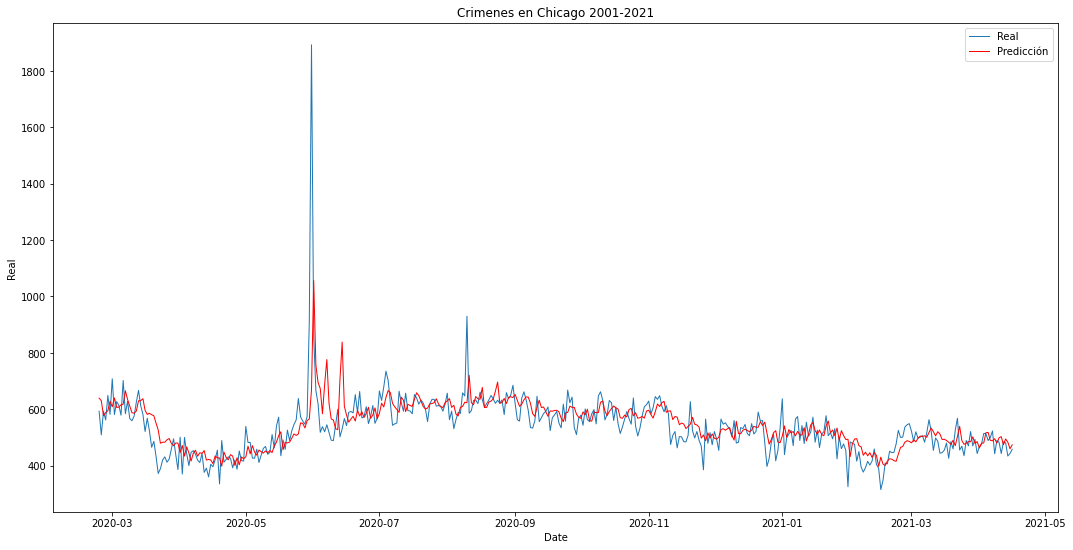

In [109]:
fig = plt.figure(figsize=(18,9))
ax = fig.add_subplot()
sns.lineplot(x=df_comparation["Date"][6500:], y=df_comparation["Real"][6500:], linewidth = 1, label = "Real" , ax = ax)
sns.lineplot(x=df_comparation["Date"][6500:],y=df_comparation["Prediccion"][6500:], linewidth = 1, label = "Predicción" , ax = ax, color = "red")
ax.set_title("Crimenes en Chicago 2001-2021")

In [110]:
y_lm_14_prediction = lin_model.predict(X_test)
y_lm_14_prediction.shape, X_test.shape

((2076,), (2076, 14))

In [111]:
get_metrics(y_lm_14_prediction, Y_test)

MSE = 4028.513109098266
r^2 = 0.5680354067848832


In [112]:
y_lm_14_prediction.shape, y_lm_7_prediction.shape

((2076,), (2078,))

In [113]:
index = int(X.shape[0]*0.7)
X_f = X[index:index+1]
X_f

array([[755, 748, 752, 760, 959, 806, 722, 745, 753, 793, 815, 837, 737,
        797]])

In [114]:
df_comparation = pd.DataFrame({"Date" : ts_crime["Date"][int(X.shape[0]*0.7)+14:-1],
                              "Real" : Y_test,
                              "Prediccion" : y_lm_14_prediction})

Text(0.5, 1.0, 'Crimenes en Chicago 2001-2021')

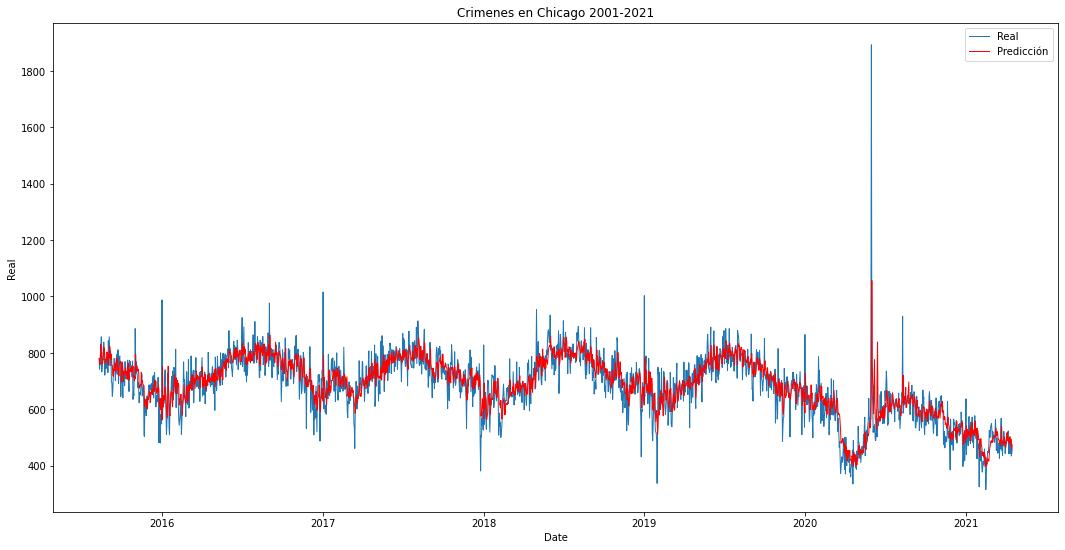

In [115]:
fig = plt.figure(figsize=(18,9))
ax = fig.add_subplot()
sns.lineplot(x=df_comparation["Date"], y=df_comparation["Real"], linewidth = 1, label = "Real" ,ax = ax)
sns.lineplot(x=df_comparation["Date"],y=df_comparation["Prediccion"], linewidth = 1, label = "Predicción", ax = ax, color = "red")
ax.set_title("Crimenes en Chicago 2001-2021")

In [116]:
Y_f = []

In [117]:
for i in range (len(X_test)):
  pred = lin_model.predict(X_f[-1].reshape(1,-1))[0]
  Y_f.append(pred)
  x_tmp = list(X_f[-1][1:])
  x_tmp.append(pred)
  X_f = np.append(X_f,[x_tmp], axis=0)

In [118]:
y_lm_14_forecasting = np.array(Y_f)

In [119]:
df_comparation = pd.DataFrame({"Date" : ts_crime["Date"][int(X.shape[0]*0.7)+14:-1],
                              "Real" : Y_test,
                              "Prediccion" : y_lm_14_forecasting})

Text(0.5, 1.0, 'Crimenes en Chicago 2001-2021')

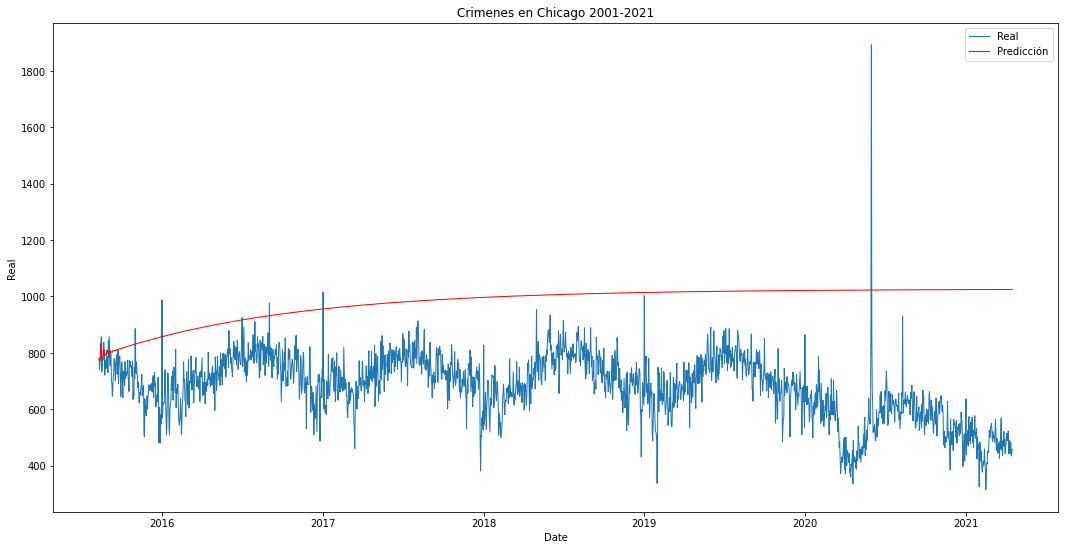

In [120]:
fig = plt.figure(figsize=(18,9))
ax = fig.add_subplot()
sns.lineplot(x=df_comparation["Date"], y=df_comparation["Real"], linewidth = 1, label = "Real" ,ax = ax)
sns.lineplot(x=df_comparation["Date"],y=df_comparation["Prediccion"], linewidth = 1, label = "Predicción", ax = ax, color = "red")
ax.set_title("Crimenes en Chicago 2001-2021")

In [121]:
get_metrics(y_lm_14_forecasting, Y_test)

MSE = 109249.23144584989
r^2 = -30.66459700193283


## Modelo LSTM

In [123]:
# Librerias para el modelo LSTM
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.callbacks import EarlyStopping
from keras.models import load_model

import time
from sklearn.preprocessing import MinMaxScaler

### Instancia 1:
**Parámetros**
* Elementos por muestra : 30
* Capas ocultas: 3 (50,50,50)
* Optimizador : adam
* loss = mean squared error

In [125]:
ts_crime.head()

,Date,Total_Crimes
0,2002-04-25,1294
1,2002-04-26,1367
2,2002-04-27,1254
3,2002-04-28,1119
4,2002-04-29,1447


In [126]:
# Scale features
s1 = MinMaxScaler(feature_range=(0,1))
Xs = s1.fit_transform(ts_crime[["Total_Crimes"]])

# Scale predicted value
s2 = MinMaxScaler(feature_range=(0,1))
Ys = s2.fit_transform(ts_crime[["Total_Crimes"]])

In [127]:
# Each time step uses last 'window' to predict the next change
window = 30
X = []
Y = []
for i in range(window,len(Xs)):
    X.append(Xs[i-window:i,:])
    Y.append(Ys[i])

# Reshape data to format accepted by LSTM
X, Y = np.array(X), np.array(Y)

In [128]:
train = ts_crime[:int(X.shape[0]*0.7)]
test = ts_crime[int(X.shape[0]*0.7):]

In [129]:
X_train = X[:int(X.shape[0]*0.7)]
X_test = X[int(X.shape[0]*0.7):]
Y_train = Y[:int(X.shape[0]*0.7)]
Y_test = Y[int(X.shape[0]*0.7):]

In [130]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(4832, 30, 1)
(2071, 30, 1)
(4832, 1)
(2071, 1)


In [131]:
# create and train LSTM model

# Initialize LSTM model
model = Sequential()

model.add(LSTM(units=50, return_sequences=True, \
          input_shape=((X.shape[1],X.shape[2])))) #(30,1)
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(optimizer = 'adam', loss = 'mean_squared_error',\
              metrics = ['accuracy'])

In [132]:
# Allow for early exit
es = EarlyStopping(monitor='loss',mode='min',verbose=1,patience=10)

# Fit (and time) LSTM model
t0 = time.time()
history = model.fit(X_train, Y_train, epochs = 10, batch_size = 250, callbacks=[es], verbose=1)
t1 = time.time()
print('Runtime: %.2f s' %(t1-t0))

Epoch 1/10
20/20 [==============================] - 25s 143ms/step - loss: 0.0850 - accuracy: 0.0000e+00
Epoch 2/10
20/20 [==============================] - 3s 140ms/step - loss: 0.0100 - accuracy: 0.0000e+00
Epoch 3/10
20/20 [==============================] - 3s 140ms/step - loss: 0.0078 - accuracy: 0.0000e+00
Epoch 4/10
20/20 [==============================] - 3s 136ms/step - loss: 0.0060 - accuracy: 0.0000e+00
Epoch 5/10
20/20 [==============================] - 3s 139ms/step - loss: 0.0059 - accuracy: 0.0000e+00
Epoch 6/10
20/20 [==============================] - 3s 138ms/step - loss: 0.0058 - accuracy: 0.0000e+00
Epoch 7/10
20/20 [==============================] - 3s 139ms/step - loss: 0.0056 - accuracy: 0.0000e+00
Epoch 8/10
20/20 [==============================] - 3s 140ms/step - loss: 0.0055 - accuracy: 0.0000e+00
Epoch 9/10
20/20 [==============================] - 3s 138ms/step - loss: 0.0057 - accuracy: 0.0000e+00
Epoch 10/10
20/20 [==============================] - 3s 139ms/s

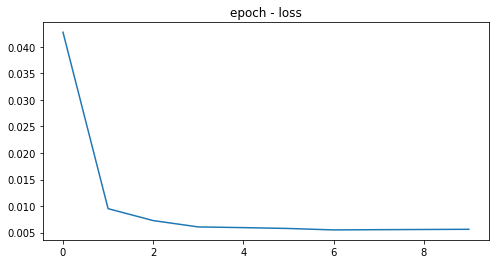

In [133]:
fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot()
sns.lineplot(data = history.history['loss'], ax = ax)
ax.set_title("epoch - loss");

In [134]:
# Verify the fit of the model
Yp = model.predict(X_train)

# un-scale outputs
Yu = s2.inverse_transform(Yp)
Ym = s2.inverse_transform(Y_train)

In [135]:
Ym = Ym[:,0]
Yu = Yu[:,0]

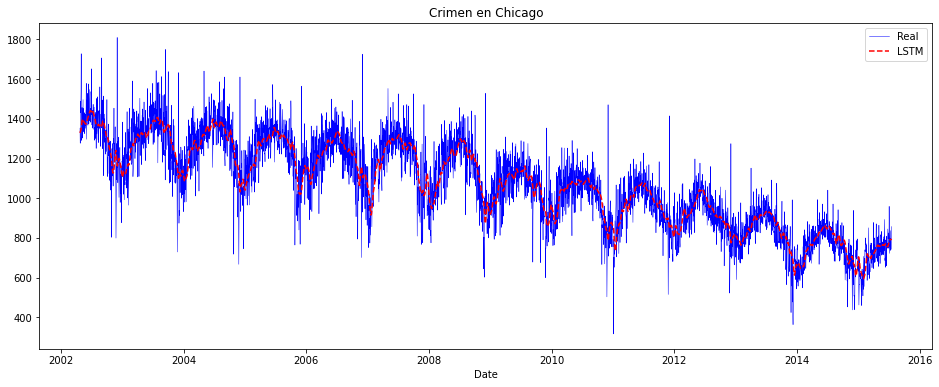

In [136]:
fig = plt.figure(figsize=(16,6))
ax = fig.add_subplot()
sns.lineplot(x = train["Date"], y = Ym, color = "blue", label = "Real",linewidth = .5 ,  ax = ax)
sns.lineplot(x = train["Date"], y = Yu, color = "red" , ls = "--", label = "LSTM",  ax = ax)
ax.set_title("Crimen en Chicago");

In [137]:
get_metrics(Ym, Yu)

MSE = 9332.800605506114
r^2 = 0.8210765172948455


In [138]:
# Verify the fit of the model
Yp = model.predict(X_test)

# un-scale outputs
Yu = s2.inverse_transform(Yp)
Ym = s2.inverse_transform(Y_test)

In [139]:
Ym = Ym[:,0]
Yu = Yu[:,0]

In [140]:
get_metrics(Ym, Yu)

MSE = 5138.232382953566
r^2 = 0.599584952695398


In [141]:
y_lstm_30_prediction = Yu

In [142]:
test["Date"][window:].shape

(2071,)

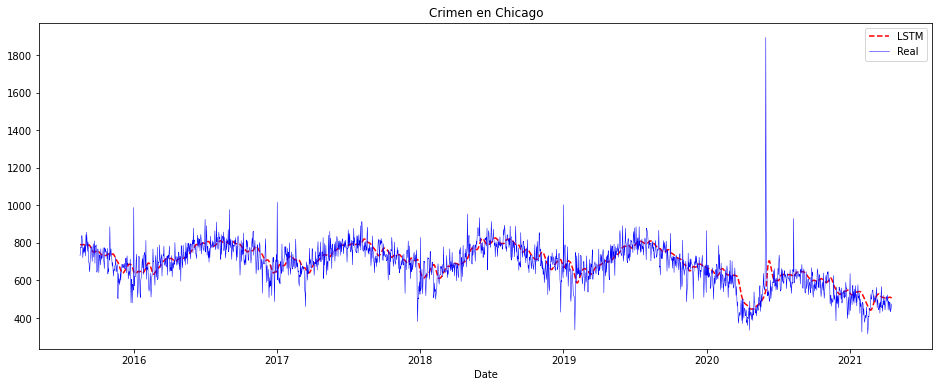

In [143]:
fig = plt.figure(figsize=(16,6))
ax = fig.add_subplot()
sns.lineplot(x = test["Date"][window:], y = Yu, color = "red" , ls = "--", label = "LSTM",  ax = ax)
sns.lineplot(x = test["Date"][window:], y = Ym, color = "blue", label = "Real",linewidth = .5 ,  ax = ax)
ax.set_title("Crimen en Chicago");

In [144]:
X_f = X_test[-1:]
X_f.shape

(1, 30, 1)

In [145]:
pred = model.predict(X_f[-1:])[0]
pred

array([0.12126096], dtype=float32)

In [146]:
x_tmp = X_f[-1][1:]
x_tmp = np.append(x_tmp, pred).reshape(-1,1)
X_f = np.append(X_f,[x_tmp], axis=0)

In [147]:
X_f = X_test[-1:]
Y_f = []
for _ in range(len(X_test)):
  pred = model.predict(X_f[-1:])[0]
  Y_f.append(pred[0])
  x_tmp = X_f[-1][1:]
  x_tmp = np.append(x_tmp, pred).reshape(-1,1)
  X_f = np.append(X_f,[x_tmp], axis=0)

In [148]:
Yu = s2.inverse_transform(np.array(Y_f).reshape(-1,1))

In [149]:
Ym = s2.inverse_transform(Y_test)
Ym = Ym[:,0]

In [152]:
Yu = Yu[:,0]

In [153]:
y_lstm_30_forecasting = Yu

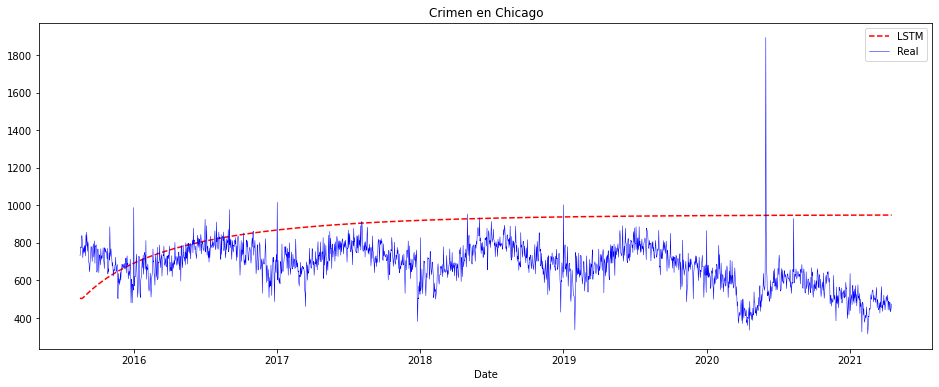

In [154]:
fig = plt.figure(figsize=(16,6))
ax = fig.add_subplot()
sns.lineplot(x = test["Date"][window:], y = Yu, color = "red" , ls = "--", label = "LSTM",  ax = ax)
sns.lineplot(x = test["Date"][window:], y = Ym, color = "blue", label = "Real",linewidth = .5 ,  ax = ax)
ax.set_title("Crimen en Chicago");

In [155]:
get_metrics(Ym, y_lstm_30_forecasting)

MSE = 69081.41680808701
r^2 = -4.38341529099523


### Instancia 2:
**Parámetros**
* Elementos por muestra : 60
* Capas ocultas: 3 (50,50,50)
* Optimizador : adam
* loss = mean squared error

In [156]:
ts_crime.head()

,Date,Total_Crimes
0,2002-04-25,1294
1,2002-04-26,1367
2,2002-04-27,1254
3,2002-04-28,1119
4,2002-04-29,1447


In [157]:
# Scale features
s1 = MinMaxScaler(feature_range=(0,1))
Xs = s1.fit_transform(ts_crime[["Total_Crimes"]])

# Scale predicted value
s2 = MinMaxScaler(feature_range=(0,1))
Ys = s2.fit_transform(ts_crime[["Total_Crimes"]])

In [158]:
# Each time step uses last 'window' to predict the next change
window = 60
X = []
Y = []
for i in range(window,len(Xs)):
    X.append(Xs[i-window:i,:])
    Y.append(Ys[i])

# Reshape data to format accepted by LSTM
X, Y = np.array(X), np.array(Y)

In [159]:
train = ts_crime[:int(X.shape[0]*0.7)]
test = ts_crime[int(X.shape[0]*0.7):]

In [160]:
X_train = X[:int(X.shape[0]*0.7)]
X_test = X[int(X.shape[0]*0.7):]
Y_train = Y[:int(X.shape[0]*0.7)]
Y_test = Y[int(X.shape[0]*0.7):]

In [161]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(4811, 60, 1)
(2062, 60, 1)
(4811, 1)
(2062, 1)


In [162]:
# create and train LSTM model

# Initialize LSTM model
model = Sequential()

model.add(LSTM(units=50, return_sequences=True, \
          input_shape=((X.shape[1],X.shape[2])))) #(60,1)
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(optimizer = 'adam', loss = 'mean_squared_error',\
              metrics = ['accuracy'])

In [163]:
# Allow for early exit
es = EarlyStopping(monitor='loss',mode='min',verbose=1,patience=10)

# Fit (and time) LSTM model
t0 = time.time()
history = model.fit(X_train, Y_train, epochs = 10, batch_size = 250, callbacks=[es], verbose=1)
t1 = time.time()
print('Runtime: %.2f s' %(t1-t0))

Epoch 1/10
20/20 [==============================] - 11s 266ms/step - loss: 0.0924 - accuracy: 0.0000e+00
Epoch 2/10
20/20 [==============================] - 5s 264ms/step - loss: 0.0100 - accuracy: 0.0000e+00
Epoch 3/10
20/20 [==============================] - 5s 262ms/step - loss: 0.0075 - accuracy: 0.0000e+00
Epoch 4/10
20/20 [==============================] - 5s 267ms/step - loss: 0.0068 - accuracy: 0.0000e+00
Epoch 5/10
20/20 [==============================] - 5s 264ms/step - loss: 0.0060 - accuracy: 0.0000e+00
Epoch 6/10
20/20 [==============================] - 5s 263ms/step - loss: 0.0062 - accuracy: 0.0000e+00
Epoch 7/10
20/20 [==============================] - 5s 266ms/step - loss: 0.0059 - accuracy: 0.0000e+00
Epoch 8/10
20/20 [==============================] - 5s 265ms/step - loss: 0.0056 - accuracy: 0.0000e+00
Epoch 9/10
20/20 [==============================] - 5s 266ms/step - loss: 0.0054 - accuracy: 0.0000e+00
Epoch 10/10
20/20 [==============================] - 5s 264ms/s

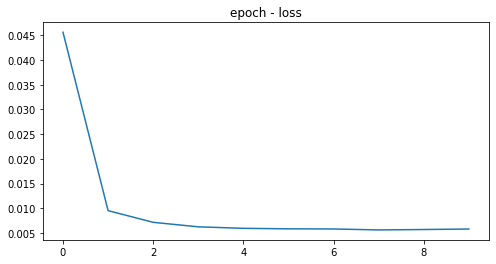

In [164]:
fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot()
sns.lineplot(data = history.history['loss'], ax = ax)
ax.set_title("epoch - loss");

In [165]:
# Verify the fit of the model
Yp = model.predict(X_train)

# un-scale outputs
Yu = s2.inverse_transform(Yp)
Ym = s2.inverse_transform(Y_train)

In [166]:
Ym = Ym[:,0]
Yu = Yu[:,0]

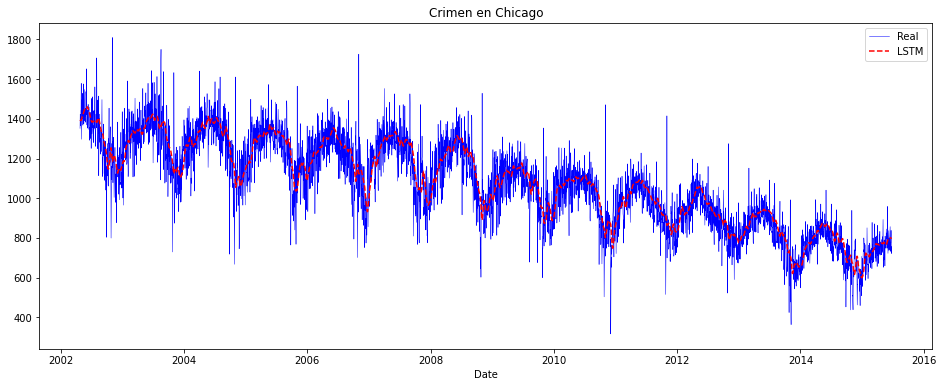

In [167]:
fig = plt.figure(figsize=(16,6))
ax = fig.add_subplot()
sns.lineplot(x = train["Date"], y = Ym, color = "blue", label = "Real",linewidth = .5 ,  ax = ax)
sns.lineplot(x = train["Date"], y = Yu, color = "red" , ls = "--", label = "LSTM",  ax = ax)
ax.set_title("Crimen en Chicago");

In [168]:
get_metrics(Ym, Yu)

MSE = 9541.09485607188
r^2 = 0.8159226699529096


In [169]:
# Verify the fit of the model
Yp = model.predict(X_test)

# un-scale outputs
Yu = s2.inverse_transform(Yp)
Ym = s2.inverse_transform(Y_test)

In [170]:
get_metrics(Ym, Yu)

MSE = 5411.4777257120095
r^2 = 0.5785603294700428


In [171]:
Ym = Ym[:,0]
Yu = Yu[:,0]

In [172]:
y_lstm_60_prediction = Yu

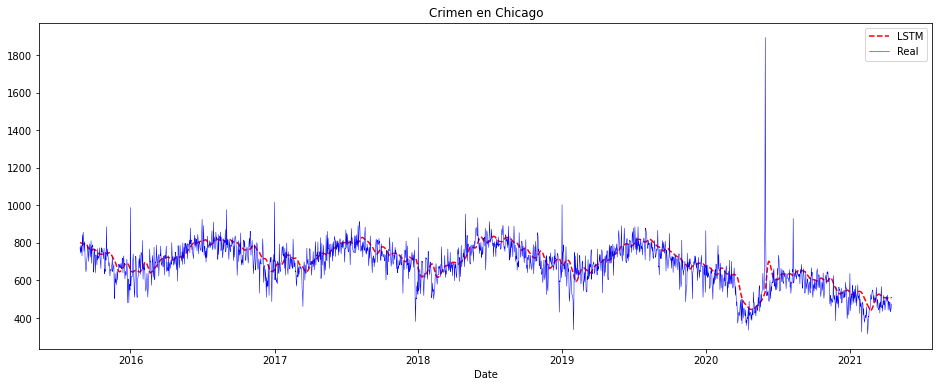

In [173]:
fig = plt.figure(figsize=(16,6))
ax = fig.add_subplot()
sns.lineplot(x = test["Date"][window:], y = Yu, color = "red" , ls = "--", label = "LSTM",  ax = ax)
sns.lineplot(x = test["Date"][window:], y = Ym, color = "blue", label = "Real",linewidth = .5 ,  ax = ax)
ax.set_title("Crimen en Chicago");

In [174]:
X_f = X_test[-1:]
X_f.shape

(1, 60, 1)

In [175]:
pred = model.predict(X_f[-1:])[0]
pred

array([0.12174386], dtype=float32)

In [176]:
x_tmp = X_f[-1][1:]
x_tmp = np.append(x_tmp, pred).reshape(-1,1)
X_f = np.append(X_f,[x_tmp], axis=0)

In [177]:
X_f = X_test[-1:]
Y_f = []
for _ in range(len(X_test)):
  pred = model.predict(X_f[-1:])[0]
  Y_f.append(pred[0])
  x_tmp = X_f[-1][1:]
  x_tmp = np.append(x_tmp, pred).reshape(-1,1)
  X_f = np.append(X_f,[x_tmp], axis=0)

In [178]:
Yu = s2.inverse_transform(np.array(Y_f).reshape(-1,1))

In [179]:
Yu = Yu[:,0]
Yu.shape

(2062,)

In [180]:
y_lstm_60_forecasting = Yu

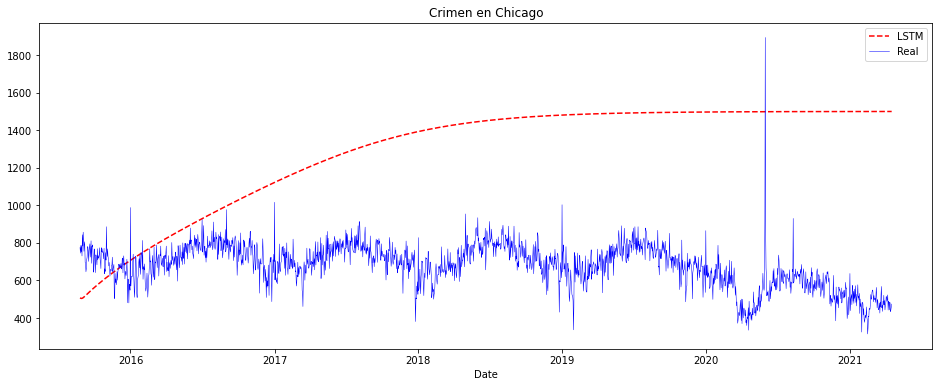

In [181]:
fig = plt.figure(figsize=(16,6))
ax = fig.add_subplot()
sns.lineplot(x = test["Date"][window:], y = Yu, color = "red" , ls = "--", label = "LSTM",  ax = ax)
sns.lineplot(x = test["Date"][window:], y = Ym, color = "blue", label = "Real",linewidth = .5 ,  ax = ax)
ax.set_title("Crimen en Chicago");

In [182]:
get_metrics(Ym, y_lstm_60_forecasting)

MSE = 481157.67451428314
r^2 = -36.47200711125157


## Prophet

In [183]:
# Importamos Prophet
from fbprophet import Prophet

In [184]:
# Tenemos una data frame de cada fecha en que se cometio un crimen en Chicago
# dese 2002 a 2021
df_pr = ts_crime.copy()
df_pr

,Date,Total_Crimes
0,2002-04-25,1294
1,2002-04-26,1367
2,2002-04-27,1254
3,2002-04-28,1119
4,2002-04-29,1447
...,...,...
6928,2021-04-13,481
6929,2021-04-14,434
6930,2021-04-15,443
6931,2021-04-16,458


In [185]:
# Prophet necesita un formato muy epscifico para utilizar su libreria
# Asi que nombraremos las fechas con Date = "ds" y Total_Crimenes = "y"
df_pr.columns = ['ds', 'y']
df_pr

,ds,y
0,2002-04-25,1294
1,2002-04-26,1367
2,2002-04-27,1254
3,2002-04-28,1119
4,2002-04-29,1447
...,...,...
6928,2021-04-13,481
6929,2021-04-14,434
6930,2021-04-15,443
6931,2021-04-16,458


In [186]:
# Dividimos nuestros datos en train y tes
train_data_pr = df_pr[:len(ts_crime)-100]
test_data_pr = df_pr[:len(ts_crime)-12:]

In [187]:
print (train_data_pr.shape)
print (test_data_pr.shape)

(6833, 2)
(6921, 2)


In [188]:
m = Prophet()
m.fit(train_data_pr)
future = m.make_future_dataframe(periods=100)
prophet_pred = m.predict(future)
prophet_pred.tail()

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
6928,2021-04-13,575.382052,442.601329,660.407931,574.867615,575.896259,-19.382060,-19.382060,-19.382060,-0.065312,-0.065312,-0.065312,-19.316749,-19.316749,-19.316749,0.0,0.0,0.0,555.999991
6929,2021-04-14,575.259605,449.818810,668.514112,574.730381,575.786133,-11.096843,-11.096843,-11.096843,6.903962,6.903962,6.903962,-18.000806,-18.000806,-18.000806,0.0,0.0,0.0,564.162762
6930,2021-04-15,575.137158,445.148029,669.731268,574.593752,575.676485,-20.009341,-20.009341,-20.009341,-3.460758,-3.460758,-3.460758,-16.548584,-16.548584,-16.548584,0.0,0.0,0.0,555.127817
6931,2021-04-16,575.014712,495.199212,719.808568,574.437448,575.561122,36.543434,36.543434,36.543434,51.512577,51.512577,51.512577,-14.969142,-14.969142,-14.969142,0.0,0.0,0.0,611.558146
6932,2021-04-17,574.892265,450.680395,676.944878,574.282125,575.452199,-10.634557,-10.634557,-10.634557,2.639238,2.639238,2.639238,-13.273796,-13.273796,-13.273796,0.0,0.0,0.0,564.257708


In [189]:
test_data = prophet_pred[["ds", "yhat"]][-100:]
test_data

,ds,yhat
6833,2021-01-08,539.788182
6834,2021-01-09,492.513785
6835,2021-01-10,445.831530
6836,2021-01-11,480.378049
6837,2021-01-12,493.291764
...,...,...
6928,2021-04-13,555.999991
6929,2021-04-14,564.162762
6930,2021-04-15,555.127817
6931,2021-04-16,611.558146


In [190]:
test_data["Real"] = ts_crime["Total_Crimes"][-100:]

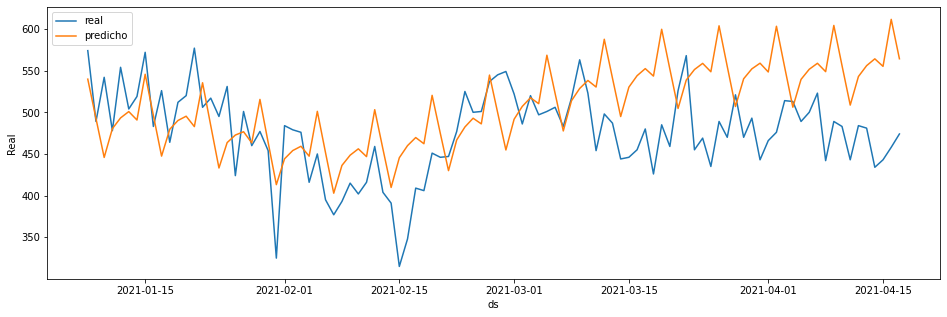

In [191]:
plt.figure(figsize=(16,5))
ax = sns.lineplot(x= test_data['ds'], y=test_data["Real"], label = "real")
sns.lineplot(x=test_data['ds'], y = test_data["yhat"], label= "predicho");

In [192]:
test_data = prophet_pred[["ds", "yhat"]]
test_data["Real"] = ts_crime["Total_Crimes"]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



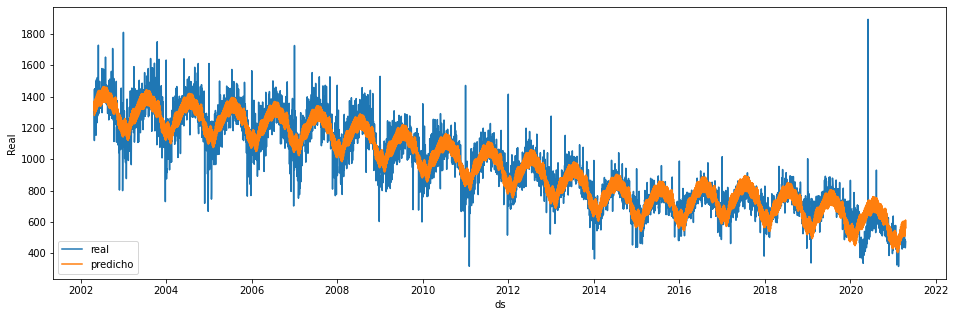

In [193]:
plt.figure(figsize=(16,5))
ax = sns.lineplot(x= test_data['ds'], y=test_data["Real"], label = "real")
sns.lineplot(x=test_data['ds'], y = test_data["yhat"], label= "predicho");

In [194]:
y_prophet_forecasting = test_data["yhat"][-100:]

In [195]:
get_metrics(test_data["Real"][-100:], test_data["yhat"][-100:])

MSE = 4250.698384536354
r^2 = -0.6479407554223284


## SARIMAX

In [196]:
pip install pmdarima

     |████████████████████████████████| 1.5MB 5.3MB/s 
     |████████████████████████████████| 9.5MB 22.1MB/s 
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [197]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf 
from statsmodels.tsa.seasonal import seasonal_decompose 
from pmdarima import auto_arima    

In [198]:
df_ar = ts_crime.copy()
df_ar = df_ar.set_index("Date")

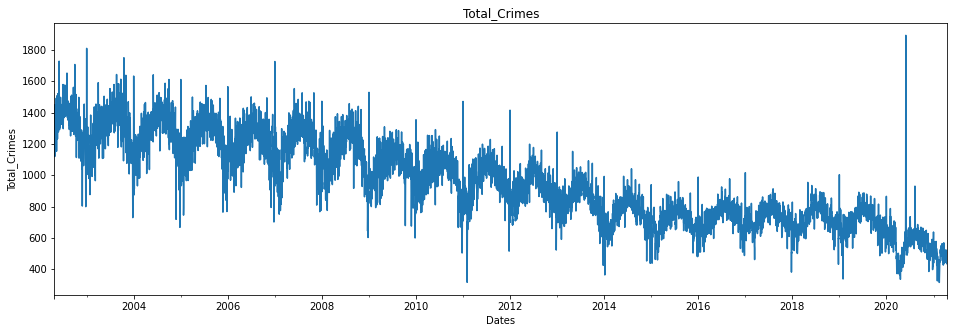

In [199]:
df_ar.index.freq = "D"
ax = df_ar['Total_Crimes'].plot(figsize = (16,5), title = "Total_Crimes")
ax.set(xlabel='Dates', ylabel='Total_Crimes');

<Figure size 1152x432 with 0 Axes>

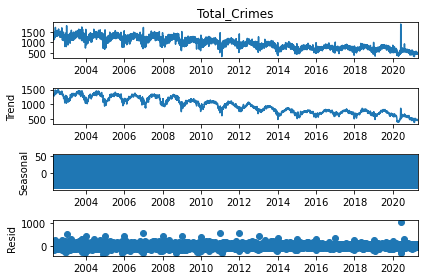

In [200]:
a = seasonal_decompose(df_ar["Total_Crimes"], model = "add")
fig = plt.figure(figsize=(16,6))
a.plot();

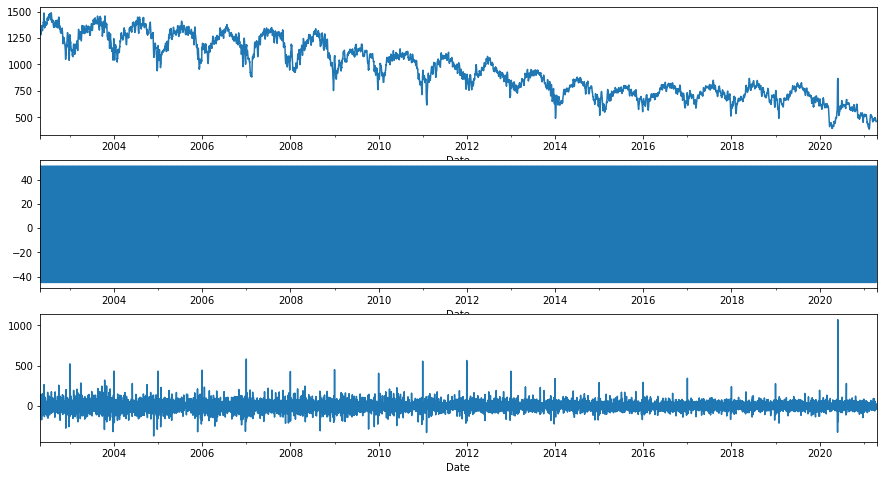

In [201]:
fig, (ax1,ax2,ax3) = plt.subplots(3,1, figsize=(15,8))
a.trend.plot(ax=ax1)
a.resid.plot(ax=ax3)
a.seasonal.plot(ax=ax2)

In [202]:
auto_arima(df_ar['Total_Crimes'], seasonal=True, frequency=365).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 6933
Model:               SARIMAX(0, 1, 3)   Log Likelihood              -40445.754
Date:                Wed, 23 Jun 2021   AIC                          80899.508
Time:                        22:23:30   BIC                          80926.884
Sample:                             0   HQIC                         80908.946
                               - 6933                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.6236      0.007    -84.266      0.000      -0.638      -0.609
ma.L2         -0.1897      0.012    -15.220      0.000      -0.214      -0.165
ma.L3         -0.0537      0.011     -4.754      0.000      -0.076      -0.032
sigma2      6844.6447     45.546    150.280      0.000    6755.377    6933.913
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             45358.77
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.40   Skew:                             0.88
Prob(H) (two-sided):                  0.00   Kurtosis:                        15.41
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [203]:
train_data = df_ar[:-100]
test_data = df_ar[-100:]
arima_model = SARIMAX(train_data['Total_Crimes'], order = (2,1,1), seasonal_order = (4,0,3,12))
arima_result = arima_model.fit()
arima_result.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



<class 'statsmodels.iolib.summary.Summary'>
"""
                                         SARIMAX Results                                          
==================================================================================================
Dep. Variable:                               Total_Crimes   No. Observations:                 6833
Model:             SARIMAX(2, 1, 1)x(4, 0, [1, 2, 3], 12)   Log Likelihood              -39727.027
Date:                                    Wed, 23 Jun 2021   AIC                          79476.055
Time:                                            22:27:22   BIC                          79551.178
Sample:                                        04-25-2002   HQIC                         79501.972
                                             - 01-07-2021                                         
Covariance Type:                                      opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3003      0.010     28.894      0.000       0.280       0.321
ar.L2          0.0225      0.013      1.735      0.083      -0.003       0.048
ma.L1         -0.9042      0.006   -139.524      0.000      -0.917      -0.891
ar.S.L12      -0.8332      0.019    -43.609      0.000      -0.871      -0.796
ar.S.L24       0.7589      0.028     27.194      0.000       0.704       0.814
ar.S.L36       0.9863      0.020     49.423      0.000       0.947       1.025
ar.S.L48       0.0150      0.013      1.117      0.264      -0.011       0.041
ma.S.L12       0.8069      0.013     60.316      0.000       0.781       0.833
ma.S.L24      -0.7879      0.022    -35.316      0.000      -0.832      -0.744
ma.S.L36      -0.9686      0.013    -73.609      0.000      -0.994      -0.943
sigma2      7094.9513     51.734    137.143      0.000    6993.554    7196.348
===================================================================================
Ljung-Box (L1) (Q):                   0.39   Jarque-Bera (JB):             51800.14
Prob(Q):                              0.53   Prob(JB):                         0.00
Heteroskedasticity (H):               0.43   Skew:                             0.95
Prob(H) (two-sided):                  0.00   Kurtosis:                        16.36
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [204]:
arima_pred = arima_result.predict(start = len(train_data), end = len(df_ar)-1, typ="levels").rename("ARIMA Predictions")
len(arima_pred)

100

In [205]:
y_sarimax = arima_pred.values

In [206]:
ts_crime.tail()


,Date,Total_Crimes
6928,2021-04-13,481
6929,2021-04-14,434
6930,2021-04-15,443
6931,2021-04-16,458
6932,2021-04-17,474


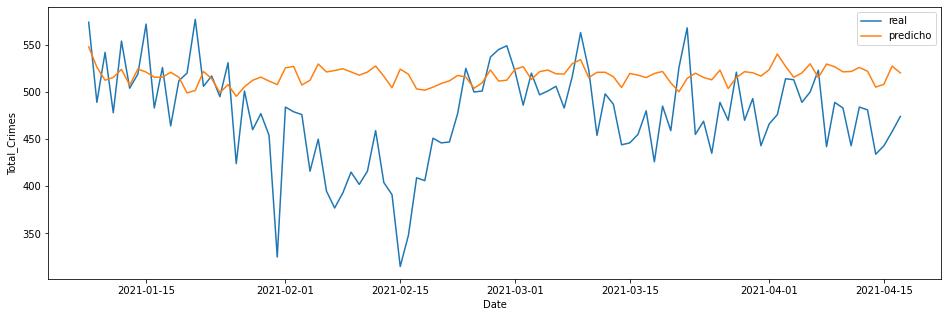

In [207]:
plt.figure(figsize=(16,5))
ax = sns.lineplot(x= ts_crime["Date"][-100:], y = ts_crime["Total_Crimes"][-100:], label = "real")
sns.lineplot(x=ts_crime["Date"][-100:], y = y_sarimax, label= "predicho");

In [208]:
get_metrics(ts_crime["Total_Crimes"][-100:], y_sarimax)

MSE = 4244.087390480223
r^2 = -0.6453777585796008


In [209]:
test_100 = ts_crime[-100:]

Text(0.5, 1.0, 'Crimenes en Chicago 2001-2021')

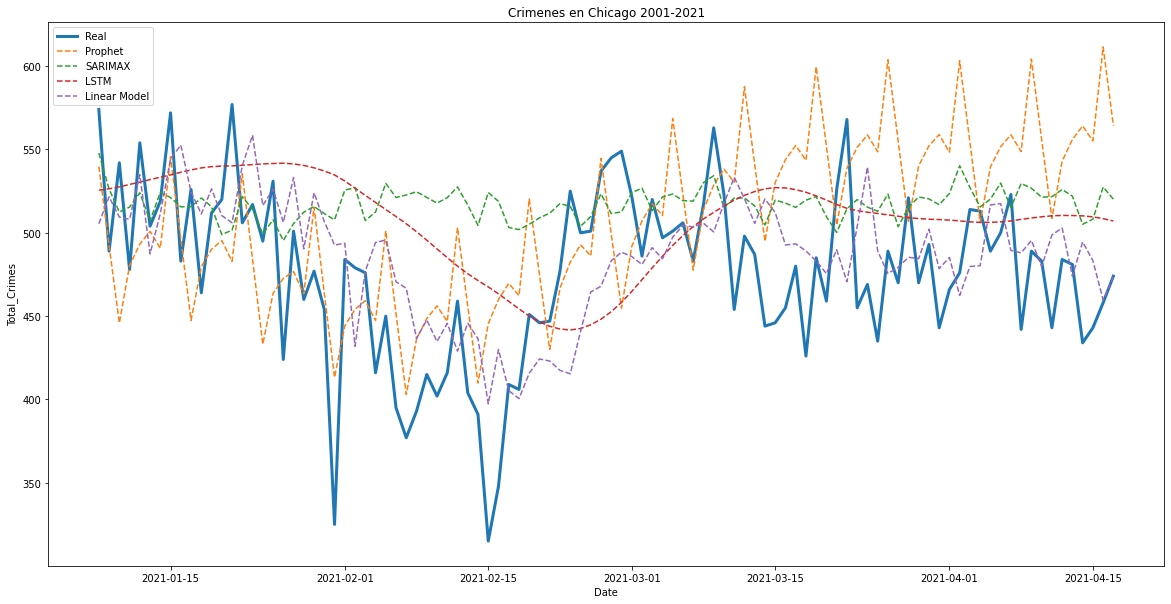

In [210]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot()
sns.lineplot(x = test_100["Date"], y=test_100["Total_Crimes"], linewidth = 3, label = "Real" ,ax = ax)
sns.lineplot(x = test_100["Date"], y= y_prophet_forecasting, linewidth = 1.5, ls = "--", label = "Prophet" ,ax = ax)
sns.lineplot(x = test_100["Date"], y= y_sarimax, linewidth = 1.5,ls = "--", label = "SARIMAX" ,ax = ax)
sns.lineplot(x = test_100["Date"], y= y_lstm_60_prediction[-100:], linewidth = 1.5,ls = "--", label = "LSTM" ,ax = ax)
sns.lineplot(x = test_100["Date"], y= y_lm_14_prediction[-100:], linewidth = 1.5,ls = "--", label = "Linear Model" ,ax = ax)
ax.set_title("Crimenes en Chicago 2001-2021")

# Aplicación de Prophet

## Entrenamiento de modelo por cada distrito

In [57]:
# Importamos Prophet
from fbprophet import Prophet

In [58]:
url = "https://raw.githubusercontent.com/EduHdzVillasana/Proyecto_ML_BEDU/main/crimes_by_districts.csv"
df_districts = pd.read_csv(url, index_col=0)

In [59]:
df_districts.sample(5)

,Date,Total_Crimes,District 1,District 2,District 3,District 4,District 5,District 6,District 7,District 8,District 9,District 10,District 11,District 12,District 14,District 15,District 16,District 17,District 18,District 19,District 20,District 22,District 24,District 25
529,2003-10-06,1408,52.0,64.0,48.0,67,63.0,84.0,87.0,75.0,91.0,60.0,148.0,69.0,52.0,121.0,36.0,28.0,52.0,43.0,17.0,47.0,27.0,77.0
6250,2019-06-05,783,55.0,31.0,38.0,40,36.0,55.0,39.0,44.0,23.0,37.0,53.0,41.0,40.0,27.0,30.0,15.0,35.0,35.0,10.0,30.0,28.0,41.0
5331,2016-11-28,688,51.0,26.0,29.0,29,32.0,46.0,41.0,47.0,39.0,36.0,33.0,35.0,31.0,21.0,20.0,22.0,45.0,26.0,6.0,23.0,19.0,31.0
1295,2005-11-10,1233,50.0,60.0,61.0,103,59.0,68.0,70.0,80.0,67.0,55.0,82.0,76.0,48.0,44.0,34.0,35.0,35.0,45.0,18.0,43.0,32.0,68.0
2448,2009-01-06,966,39.0,40.0,51.0,50,56.0,54.0,60.0,75.0,53.0,22.0,57.0,45.0,39.0,46.0,28.0,24.0,49.0,38.0,18.0,33.0,28.0,61.0


In [60]:
def get_metrics (real, prediction, label = ""):
  from sklearn.metrics import mean_squared_error
  from sklearn.metrics import r2_score
  MSE = (mean_squared_error(real, prediction))
  r2 = (r2_score(real, prediction))
  print(label +" MSE = "+str(MSE) + " r^2 = "+str(r2))
  return {"MSE": MSE, "r2": r2}

In [61]:
predictions_dict = {}
models_by_district = {}
scores = {}
scores["Distrito"] = []
scores["MSE"] = []
scores["r2"] = []
scores["std"] = []
for district in districts:
  district_string = f"District {district}"
  df_tmp = df_districts[["Date",district_string]].copy()
  df_tmp.columns = ['ds', 'y']
  model = Prophet();
  model.fit(df_tmp)
  models_by_district[district_string] = model
  future = model.make_future_dataframe(periods = 100)
  prediction = model.predict(future)
  prediction = prediction[["ds","yhat"]]
  predictions_dict[district_string] = prediction["yhat"]
  metrics = get_metrics(df_tmp["y"], prediction["yhat"][:-100], district_string)
  scores["Distrito"].append(district_string)
  scores["MSE"].append(metrics["MSE"])
  scores["r2"].append(metrics["r2"])
  scores["std"].append(np.sqrt(metrics["MSE"]))
  predictions_dict["Date"] = prediction["ds"]
  
  

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


District 1 MSE = 82.38468270560837 r^2 = 0.47075407051018237


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


District 2 MSE = 72.89431938836422 r^2 = 0.7487736731324428


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


District 3 MSE = 72.38293518098352 r^2 = 0.7344055530917084


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


District 4 MSE = 86.93468595854317 r^2 = 0.7032851732907541


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


District 5 MSE = 63.722582385487726 r^2 = 0.66347793215521


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


District 6 MSE = 85.57254597575515 r^2 = 0.6568800236591888


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


District 7 MSE = 96.85635795914881 r^2 = 0.7611552789282959


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


District 8 MSE = 103.3802586643919 r^2 = 0.7828192032735638


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


District 9 MSE = 70.44584515912781 r^2 = 0.7578205416064194


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


District 10 MSE = 64.8303047086591 r^2 = 0.5686079646822246


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


District 11 MSE = 153.34704126184906 r^2 = 0.5484377404931537


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


District 12 MSE = 73.8465264609867 r^2 = 0.7044288891578541


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


District 14 MSE = 55.835759340213265 r^2 = 0.7327155942977185


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


District 15 MSE = 105.37161777194011 r^2 = 0.5795716626719775


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


District 16 MSE = 44.07846115373398 r^2 = 0.5742892128273562


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


District 17 MSE = 36.52964078186977 r^2 = 0.6076954700313704


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


District 18 MSE = 80.79208065199471 r^2 = 0.5901386346580104


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


District 19 MSE = 73.19618549561947 r^2 = 0.6599999835635757


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


District 20 MSE = 21.09238424556251 r^2 = 0.5211987101205685


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


District 22 MSE = 44.796768531783854 r^2 = 0.6350453728611716


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


District 24 MSE = 37.702837787341494 r^2 = 0.6463714272901413
District 25 MSE = 84.5326355750513 r^2 = 0.7505193677474984


In [62]:
pd.DataFrame(scores)

,Distrito,MSE,r2,std
0,District 1,82.384683,0.470754,9.076601
1,District 2,72.894319,0.748774,8.537817
2,District 3,72.382935,0.734406,8.507816
3,District 4,86.934686,0.703285,9.323877
4,District 5,63.722582,0.663478,7.982643
5,District 6,85.572546,0.656880,9.250543
6,District 7,96.856358,0.761155,9.841563
7,District 8,103.380259,0.782819,10.167608
8,District 9,70.445845,0.757821,8.393202
9,District 10,64.830305,0.568608,8.051727


In [63]:
predictions_df = pd.DataFrame(predictions_dict)
predictions_df["Date"] = pd.to_datetime(predictions_df.Date)
predictions_df

,District 1,Date,District 2,District 3,District 4,District 5,District 6,District 7,District 8,District 9,District 10,District 11,District 12,District 14,District 15,District 16,District 17,District 18,District 19,District 20,District 22,District 24,District 25
0,46.676139,2002-04-25,74.038418,64.422447,71.875362,57.630416,70.047074,77.971086,87.969799,69.197506,51.885156,82.711069,65.709333,59.346351,52.600707,43.630153,38.853859,56.376354,57.597358,23.838905,43.002777,38.630585,74.328398
1,49.723972,2002-04-26,75.378737,66.229631,74.028785,58.762430,72.815454,80.508879,91.770450,72.352846,54.806530,83.724532,69.894815,62.576454,54.333014,46.067754,40.514780,62.872814,61.639913,24.741705,44.794319,40.169646,77.513747
2,42.903566,2002-04-27,71.529167,63.007802,69.662057,56.563143,70.019904,77.814541,88.668931,71.185251,54.432528,80.509718,66.094080,63.121714,52.550802,43.919069,38.493766,66.654898,63.145661,23.173944,41.238466,38.952881,75.381041
3,37.228249,2002-04-28,69.370434,61.710469,68.601312,55.708139,67.459266,76.303351,86.897191,70.481389,53.496334,75.133404,63.483972,60.977146,50.289220,43.125559,37.864844,60.070722,59.683461,22.376431,40.774740,38.179468,74.099839
4,45.553441,2002-04-29,74.287321,65.499017,72.258005,58.294848,71.225686,78.669100,89.758284,69.690458,52.252728,77.761677,65.079336,59.217394,51.363978,43.838904,39.760359,54.249248,57.734842,23.811992,43.805602,40.000677,74.834016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7029,29.139802,2021-07-23,31.962828,37.706231,41.016213,33.030718,45.467293,41.317116,41.745256,31.580421,32.679949,47.410601,35.972419,24.883834,28.257800,24.410967,18.004706,31.457978,32.752753,13.117335,24.261561,22.973234,35.394797
7030,22.466965,2021-07-24,28.090314,34.271145,36.399523,30.647152,42.439161,38.285073,38.284391,30.223163,32.210932,44.111449,31.990226,25.334964,26.358909,22.196040,15.982342,35.283672,34.199214,11.525112,20.491061,21.573118,33.156050
7031,16.922561,2021-07-25,25.903340,32.761972,35.089510,29.613233,39.659834,36.436094,36.160386,29.338587,31.181919,38.655676,29.180120,23.081160,23.962239,21.353145,15.355816,28.761074,30.684971,10.712413,19.817880,20.631120,31.786994
7032,25.357248,2021-07-26,30.785111,36.342343,38.499307,32.028795,43.224268,38.468587,38.681411,28.378114,29.849063,41.210076,30.560657,21.200516,24.883110,22.034096,17.256919,23.016782,28.690679,12.142254,22.647205,22.301139,32.451509


In [64]:
real = predictions_df[:-100].copy()
predictions_df = predictions_df[-100:]

In [65]:
districts_samples = [11,9,7,2]

In [66]:
df_districts["Date"] = pd.to_datetime(df_districts.Date)

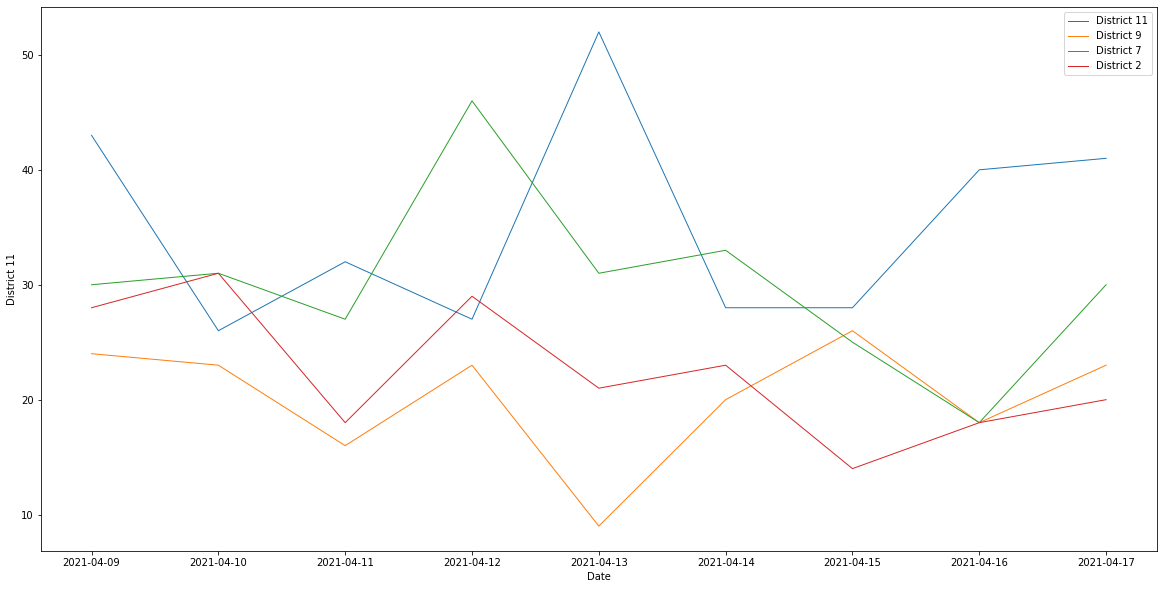

In [67]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot()
for district in districts_samples:
  district_string = f"District {district}"
  sns.lineplot(x = df_districts["Date"][-10:-1], y= df_districts[district_string][-10:-1], linewidth = 1, label = district_string ,ax = ax);

Text(0, 0.5, 'Crimenes')

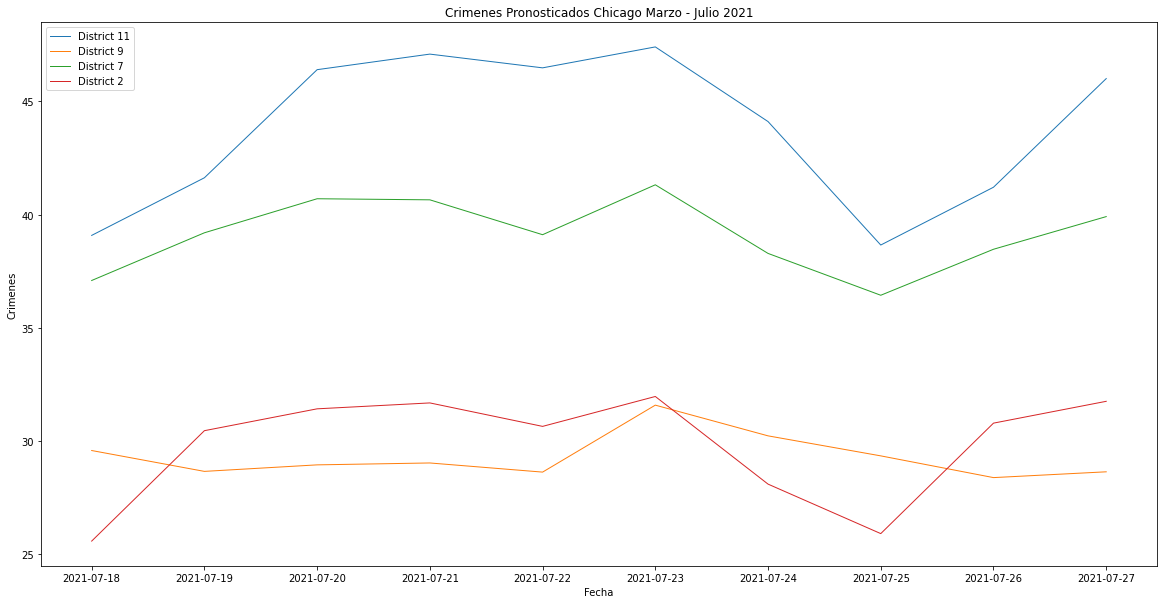

In [68]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot()
for district in districts_samples:
  district_string = f"District {district}"
  sns.lineplot(x = predictions_df["Date"][-10:], y= predictions_df[district_string][-10:], linewidth = 1, label = district_string ,ax = ax)
ax.set_title("Crimenes Pronosticados Chicago Marzo - Julio 2021")
ax.set_xlabel("Fecha")
ax.set_ylabel("Crimenes")

## Obtención de serie de tiempo

In [10]:
df["Total"] = 1

In [11]:
df["Day"] = df["Date"].apply(lambda d: d.date())

In [12]:
df[["Date","Day"]].head()

,Date,Day
0,2015-09-05 13:30:00,2015-09-05
1,2015-09-04 11:30:00,2015-09-04
3,2015-09-05 12:45:00,2015-09-05
4,2015-09-05 13:00:00,2015-09-05
5,2015-09-05 10:55:00,2015-09-05


In [13]:
df_grouped_day = df.groupby("Day")["Total"].sum()

In [14]:
df_grouped_day = pd.DataFrame({"Date":df_grouped_day.index,"Total_Crimes":df_grouped_day.values})
df_grouped_day

,Date,Total_Crimes
0,2001-01-01,274
1,2001-01-02,10
2,2001-01-03,4
3,2001-01-05,6
4,2001-01-06,6
...,...,...
7405,2021-04-14,434
7406,2021-04-15,443
7407,2021-04-16,458
7408,2021-04-17,474


Text(0.5, 1.0, 'Crimenes en Chicago 2001-2021')

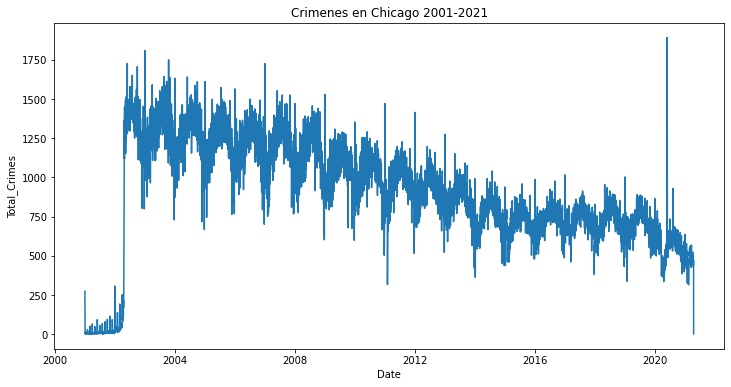

In [15]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot()
sns.lineplot(x=df_grouped_day["Date"], y=df_grouped_day["Total_Crimes"], ax = ax)
ax.set_title("Crimenes en Chicago 2001-2021")

In [16]:
df_grouped_day[460:480]

,Date,Total_Crimes
460,2002-04-09,123
461,2002-04-10,128
462,2002-04-11,136
463,2002-04-12,126
464,2002-04-13,97
465,2002-04-14,119
466,2002-04-15,217
467,2002-04-16,168
468,2002-04-17,170
469,2002-04-18,198


Se observó que a finales de abril del 2002 los crímenes aumentaron muy rapido, esto se debió probablemente a que los datos no estaban recopilados correctamente, y en esas fechas se mejoró el método de recopilación. Se eliminarán los datos de antes del 25 de abril del 2002.

In [17]:
df_grouped_day = df_grouped_day[df_grouped_day["Date"] >= dt.date(2002,4,25)]
df_grouped_day

,Date,Total_Crimes
476,2002-04-25,1294
477,2002-04-26,1367
478,2002-04-27,1254
479,2002-04-28,1119
480,2002-04-29,1447
...,...,...
7405,2021-04-14,434
7406,2021-04-15,443
7407,2021-04-16,458
7408,2021-04-17,474


Text(0.5, 1.0, 'Crimenes en Chicago 2001-2021')

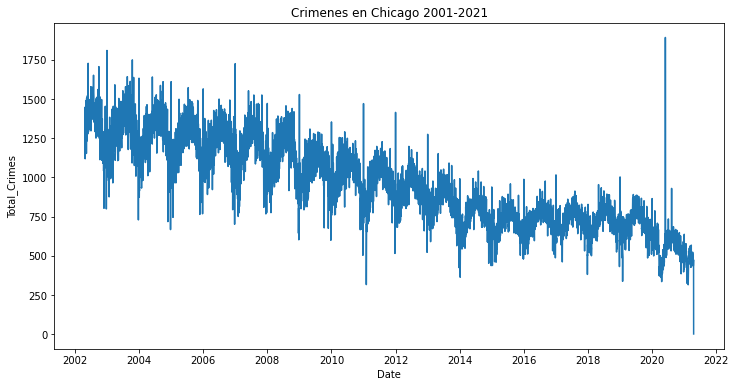

In [18]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot()
sns.lineplot(x=df_grouped_day["Date"], y=df_grouped_day["Total_Crimes"], ax = ax)
ax.set_title("Crimenes en Chicago 2001-2021")

In [19]:
df_grouped_day.to_csv("crime_time_series.csv")

In [20]:
def transformarSerieADataset(serie, elementosPorMuestra):
    dataset = None
    salidasDataset = None
    for counter in range (len(serie)-elementosPorMuestra-1):        
        muestra = np.array([serie[counter:counter+elementosPorMuestra]])        
        salida = np.array([serie[counter+elementosPorMuestra]])
        if dataset is None:
            dataset = muestra
        else:
            dataset = np.append(dataset,muestra,axis = 0)
        if salidasDataset is None:
            salidasDataset = salida    
        else:        
            salidasDataset = np.append(salidasDataset,salida)
    return dataset, salidasDataset

In [21]:
X,Y = transformarSerieADataset(df_grouped_day["Total_Crimes"].to_numpy(), 3)

In [22]:
X[:10]

array([[1294, 1367, 1254],
       [1367, 1254, 1119],
       [1254, 1119, 1447],
       [1119, 1447, 1322],
       [1447, 1322, 1450],
       [1322, 1450, 1244],
       [1450, 1244, 1296],
       [1244, 1296, 1283],
       [1296, 1283, 1254],
       [1283, 1254, 1234]])

In [23]:
Y[:10]

array([1119, 1447, 1322, 1450, 1244, 1296, 1283, 1254, 1234, 1278])

## Separación en Distritos

In [24]:
df.dtypes

ID                               int64
Case Number                     object
Date                    datetime64[ns]
Block                           object
IUCR                            object
Primary Type                    object
Description                     object
Location Description            object
Arrest                           int64
Domestic                         int64
Beat                             int64
District                       float64
Ward                           float64
Community Area                 float64
FBI Code                        object
X Coordinate                   float64
Y Coordinate                   float64
Year                             int64
Updated On                      object
Latitude                       float64
Longitude                      float64
Location                        object
Total                            int64
Day                             object
dtype: object

In [25]:
df["District"] = df["District"].apply(lambda x: int(x))

In [26]:
districts = df["District"].unique()
districts = sorted(districts)

In [27]:
districts

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15, 16, 17, 18, 19, 20, 22, 24, 25]

In [28]:
dates = df_grouped_day["Date"]

In [29]:
dates

476     2002-04-25
477     2002-04-26
478     2002-04-27
479     2002-04-28
480     2002-04-29
           ...    
7405    2021-04-14
7406    2021-04-15
7407    2021-04-16
7408    2021-04-17
7409    2021-04-18
Name: Date, Length: 6934, dtype: object

In [30]:
dict_districts = {}
for district in districts:
  dict_districts[f"District {district}"] = []

In [31]:
df_grouped_day

,Date,Total_Crimes
476,2002-04-25,1294
477,2002-04-26,1367
478,2002-04-27,1254
479,2002-04-28,1119
480,2002-04-29,1447
...,...,...
7405,2021-04-14,434
7406,2021-04-15,443
7407,2021-04-16,458
7408,2021-04-17,474


In [32]:
prueba = df.groupby(["Day", "District"])["Total"].sum()

In [33]:
prueba.transpose()

Day         District
2001-01-01  1            8
            2           11
            3            9
            4           13
            5           15
                        ..
2021-04-17  20           8
            22          20
            24          10
            25          28
2021-04-18  4            1
Name: Total, Length: 156942, dtype: int64

In [34]:
df[df["District"] == 1].groupby("Day")["Total"].sum()

Day
2001-01-01     8
2001-01-05     1
2001-01-10     1
2001-01-16     1
2001-01-30     1
              ..
2021-04-13    17
2021-04-14     9
2021-04-15    15
2021-04-16    20
2021-04-17    18
Name: Total, Length: 7111, dtype: int64

In [35]:
df_list = []
for district in districts:
  tmp = df[df["District"] == district].groupby("Day")["Total"].sum()
  df_tmp = pd.DataFrame({"Date": tmp.index, f"District {district}": tmp.values})
  df_list.append(df_tmp)

In [36]:
len(df_list)

22

In [37]:
df_districts = df_grouped_day.copy()

In [38]:
df_districts.dtypes

Date            object
Total_Crimes     int64
dtype: object

In [39]:
df_districts

,Date,Total_Crimes
476,2002-04-25,1294
477,2002-04-26,1367
478,2002-04-27,1254
479,2002-04-28,1119
480,2002-04-29,1447
...,...,...
7405,2021-04-14,434
7406,2021-04-15,443
7407,2021-04-16,458
7408,2021-04-17,474


In [40]:
pd.merge(df_districts, df_list[0], how = "left", on = "Date")

,Date,Total_Crimes,District 1
0,2002-04-25,1294,48.0
1,2002-04-26,1367,68.0
2,2002-04-27,1254,32.0
3,2002-04-28,1119,30.0
4,2002-04-29,1447,91.0
...,...,...,...
6929,2021-04-14,434,9.0
6930,2021-04-15,443,15.0
6931,2021-04-16,458,20.0
6932,2021-04-17,474,18.0


In [41]:
for data in df_list:
  df_districts = pd.merge(df_districts, data, how = "left", on = "Date")

In [42]:
df_districts = df_districts.fillna(0)

In [43]:
df_districts.sample(3)

,Date,Total_Crimes,District 1,District 2,District 3,District 4,District 5,District 6,District 7,District 8,District 9,District 10,District 11,District 12,District 14,District 15,District 16,District 17,District 18,District 19,District 20,District 22,District 24,District 25
3624,2012-03-27,867,39.0,34.0,52.0,66,41.0,56.0,61.0,56.0,35.0,42.0,54.0,37.0,24.0,43.0,36.0,27.0,24.0,34.0,15.0,22.0,17.0,52.0
3816,2012-10-05,912,44.0,31.0,33.0,41,39.0,53.0,58.0,58.0,51.0,42.0,64.0,67.0,29.0,34.0,39.0,17.0,39.0,51.0,15.0,29.0,31.0,47.0
4353,2014-03-26,722,28.0,44.0,35.0,37,32.0,36.0,43.0,51.0,38.0,21.0,54.0,40.0,21.0,44.0,25.0,20.0,25.0,27.0,6.0,25.0,17.0,53.0


In [44]:
df_districts.to_csv("crimes_by_districts.csv")